In [1]:
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import itertools
import seaborn as sns
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
from scipy.stats import ttest_ind
import itertools
from statsmodels.stats.multitest import multipletests
from sklearn.manifold import MDS
from scipy.stats import spearmanr
def hist(vals,bins,linestyle='-',label='',color=None):
    a,b= np.histogram(vals,bins)
    bin_centers = 0.5*(b[1:]+b[:-1])
    plt.plot(bin_centers,a/np.sum(a),linestyle=linestyle,label=label,color=color)
            
order=['gen','++','CD8+','Tconv','Treg']
names=[r'$P_{\rm gen}$','DP','CD8+','Tconv','Treg']
colors=['grey','darkorange','gold','darkgreen','lightblue']
palette=sns.color_palette()
colors=[palette[i] for i in [7,1,8,2,0]]
names_dict={'++':'DP', 'CD8+':'CD8+', 'Tconv':'Tconv', 'Treg':'Treg', 'gen':r'$P_{\rm gen}$'}
samples=['p2_gen', 'p2_++', 'p2_CD8+', 'p2_Treg', 'p2_Tconv', 'p22_gen','p22_++', 'p22_CD8+', 'p22_Treg', 'p22_Tconv', 'p23_gen', 'p23_++',
       'p23_CD8+', 'p23_Treg', 'p23_Tconv', 'p24_gen', 'p24_++','p24_CD8+', 'p24_Treg', 'p24_Tconv', 'p25_gen', 'p25_++',
       'p25_CD8+', 'p25_Treg', 'p25_Tconv', 'p26_gen', 'p26_++','p26_CD8+', 'p26_Treg', 'p26_Tconv', 'p27_gen', 'p27_++',
       'p27_CD8+', 'p27_Treg', 'p27_Tconv', 'p32_gen', 'p32_++','p32_CD8+', 'p32_Treg', 'p32_Tconv', 'p36_gen', 'p36_++',
       'p36_CD8+', 'p36_Treg', 'p36_Tconv']

In [2]:
matrix=pd.read_csv('results/dist_matrix_global.csv.gz')
samples=matrix.columns.values
patients=[s.split('_')[0] for s in samples]
cell_types=[s.split('_')[1] for s in samples]

/opt/miniconda3/envs/evolution/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/opt/miniconda3/envs/evolution/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/opt/miniconda3/envs/evolution/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/opt/miniconda3/envs/evolution/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in

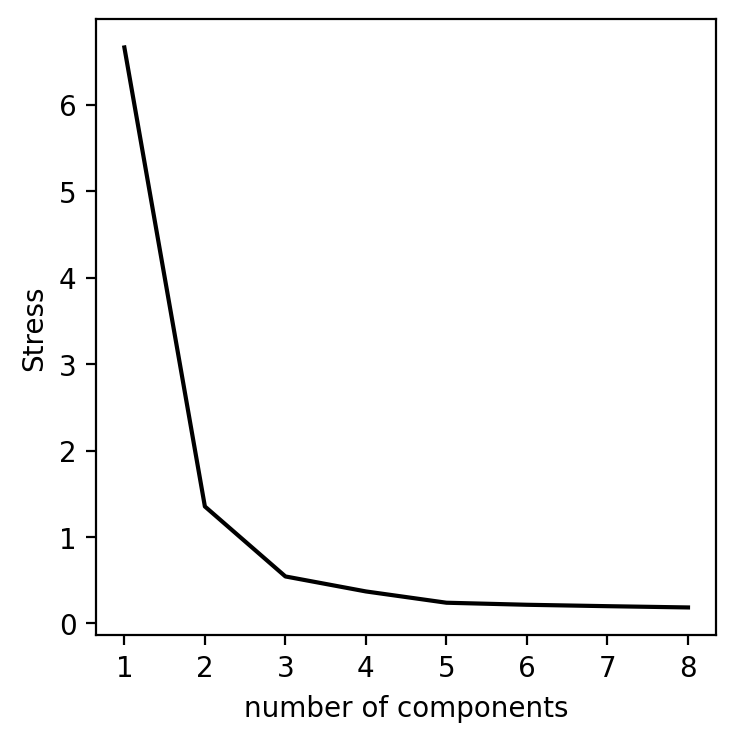

In [3]:
stresses=[]
s=[1,2,3,4,5,6,7,8]
for components in s:
    embedding = MDS(n_components=components,dissimilarity='precomputed',n_init=10)
    u0 = embedding.fit_transform(matrix.values)
    stresses.append(embedding.stress_)
plt.figure(figsize=(4,4),dpi=200)
plt.plot(s,stresses,c='k')
plt.xticks(s,s)
plt.xlabel('number of components')
plt.ylabel('Stress')
plt.show()

In [4]:
from scipy.spatial.transform import Rotation
from scipy.stats import pearsonr
subsets=[]
for cell in np.array(cell_types):
    subsets.append([cell in i for i in np.array(cell_types)])
map_cells={'gen':0,'++':1,'CD8+':2,'Treg':3,'Tconv':3}
scalar_cells=[map_cells[k] for k in cell_types]
order_patients=dict(zip(np.unique(patients),[4, 7, 5, 2, 1, 0, 6, 8, 3],))
scalar_patients=[order_patients[k] for k in patients]

In [5]:
from scipy.spatial.transform import Rotation
embedding = MDS(n_components=3,dissimilarity='precomputed',n_init=5,random_state=0)
u0 = embedding.fit_transform(matrix.values)
spearmans=[]
spearmans2=[]
for i in range(1000):
    r=Rotation.random(random_state=i)
    u1=r.apply(u0)
    spearmans.append(spearmanr(scalar_cells,u1[:,0])[0])
    spearmans2.append(pearsonr(u1[np.array(scalar_cells)==2,2][[4, 7, 5, 2, 1, 6, 0, 8, 3]],range(9))[0])
print(np.max(spearmans),np.max(spearmans2))

/opt/miniconda3/envs/evolution/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


0.9471539889553559 0.9847614387348074


In [6]:
embedding = MDS(n_components=2,dissimilarity='precomputed',n_init=5,random_state=0)
u1 = embedding.fit_transform(matrix.values)

/opt/miniconda3/envs/evolution/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [7]:
np.argmax(np.array(spearmans)+np.array(spearmans2)),np.argmax(spearmans),np.argmax(spearmans2)

(112, 112, 251)

In [8]:
r=Rotation.random(random_state=(112))
u1=r.apply(u0)

In [9]:
ptonum=dict(zip(np.unique(np.array(patients)),range(9)))
new_order=[ptonum[p] for p in ['p25','p32','p26','p23','p22','p27','p2','p36','p24']]
new_order

[4, 7, 5, 2, 1, 6, 0, 8, 3]

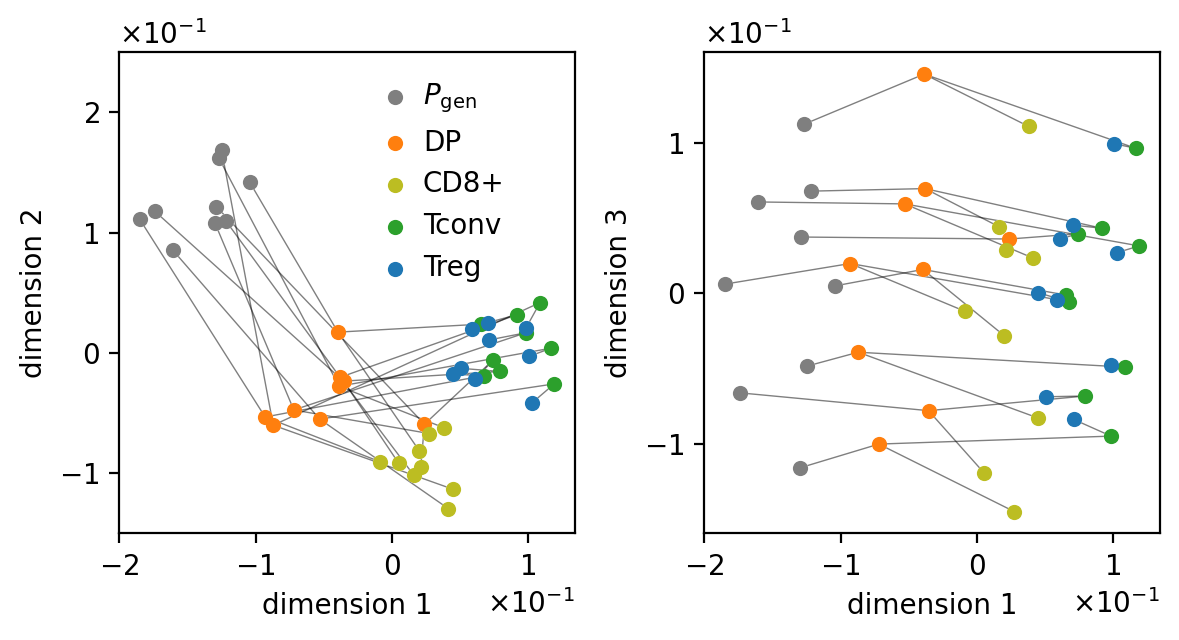

In [10]:
alpha=1
def plot_axis(ax0,ax1):
    plt.locator_params(nbins=4)
    for p in np.unique(np.array(patients)):
        embedded_patient=u1[np.array(patients)==p]
        for i in range(1):    
            plt.plot([embedded_patient[i,ax0],embedded_patient[i+1,ax0]],[embedded_patient[i,ax1],embedded_patient[i+1,ax1]],
                 c='k',linewidth=0.5,alpha=0.5,zorder=0)

        plt.plot([embedded_patient[1,ax0],embedded_patient[2,ax0]],[embedded_patient[1,ax1],embedded_patient[2,ax1]],
                 c='k',linewidth=0.5,alpha=0.5,zorder=0)
        plt.plot([embedded_patient[1,ax0],embedded_patient[3,ax0]],[embedded_patient[1,ax1],embedded_patient[3,ax1]],
                 c='k',linewidth=0.5,alpha=0.5,zorder=0)
        plt.plot([embedded_patient[3,ax0],embedded_patient[4,ax0]],[embedded_patient[3,ax1],embedded_patient[4,ax1]],
                 c='k',linewidth=0.5,alpha=0.5,zorder=0)
        
    for i in range(5):       
        plt.scatter(u1[subsets[i],ax0],u1[subsets[i],ax1],
                    c='w',alpha=1, linewidths=0,s=30)  
    for i in range(5):
        plt.scatter(u1[subsets[i],ax0],u1[subsets[i],ax1],
                    color=colors[i],label=names[i],alpha=alpha, linewidths=0,s=30)
    #for i,p in enumerate(np.unique(np.array(patients))):
    #        plt.text(u1[subsets[0],ax0][i],u1[subsets[0],ax1][i],p)
    plt.xlabel('dimension '+str(ax0+1))
    plt.ylabel('dimension '+str(ax1+1))
    if ax1==1:plt.ylim([-0.15,0.25])
    plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0),useMathText=True)
    
plt.figure(figsize=(6,3.3),dpi=200)
plt.subplot(121)
plot_axis(0,1)
plt.legend(frameon=False,bbox_to_anchor=(.49, 0.47),handletextpad=0.)
ax=plt.subplot(122)
plot_axis(0,2)
plt.tight_layout()
plt.show()

/var/folders/zj/grlgmf155zjd7j0zf9tr7v_r0000gp/T/ipykernel_60787/4158377664.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(121)


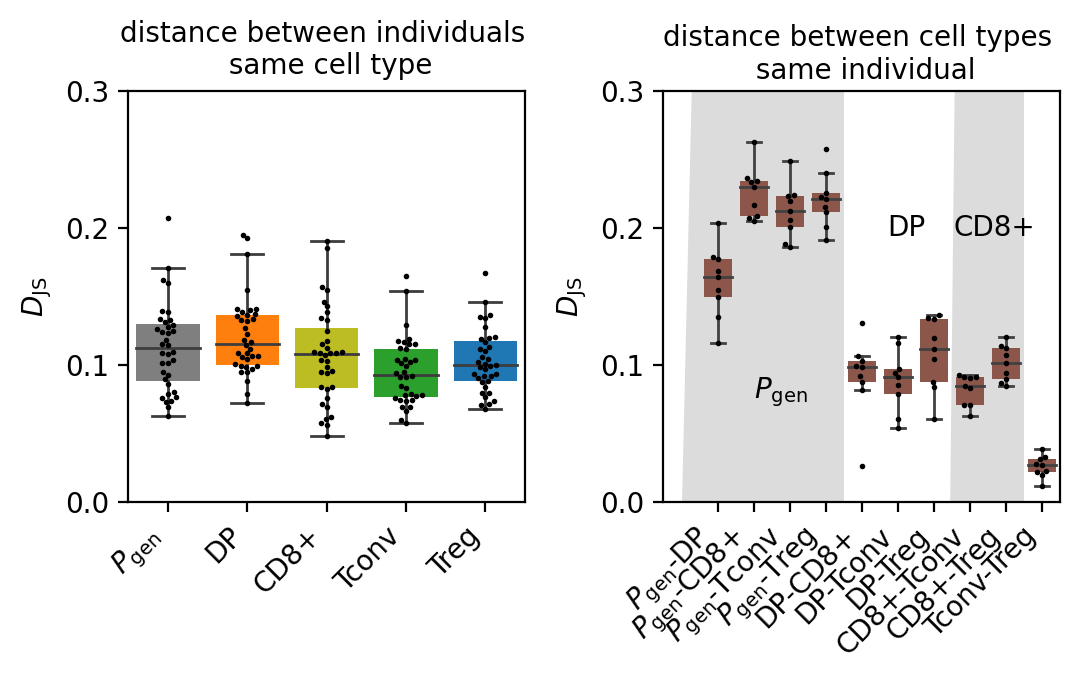

In [11]:
dist_matrix=matrix.values
inter_individuals=[]
values=[]
for j,cell in enumerate(['gen','++', 'CD8+', 'Tconv', 'Treg']):
    d=dist_matrix[np.array(cell_types)==cell][:,np.array(cell_types)==cell]
    inter_individuals.append(d[np.triu_indices(9,k=1)])
    values.append([names_dict[cell]]*len(d[np.triu_indices(9,k=1)]))
i=np.concatenate(inter_individuals)
j=np.concatenate(values)
data=pd.DataFrame(zip(i,j),columns=['DJS','cell_type'])

fig, ax = plt.subplots(figsize=(5.5,3.5),dpi=200)
ax=plt.subplot(121)
plt.locator_params(nbins=4)
c=colors
sns.boxplot(x="cell_type", y="DJS", data=data,order=names,palette=colors,linewidth=1,fliersize=0,width=0.8,saturation=1,boxprops={"linewidth": 0})
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, alpha))
for i,box in enumerate(ax.artists):
        # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
        ax.lines[j].set_color('black')
        if j%6==2 or j%6==3:ax.lines[j].set_color('white')      
            
sns.swarmplot(x="cell_type", y="DJS", data=data,order=names,color='k',size=1,edgecolor='k',linewidth=1.,orient='v')
plt.xticks(np.arange(len(names)),names)
plt.xlabel('')
plt.xticks(rotation=90)
plt.ylabel(r'$D_{\rm JS}$')
plt.ylim(0,0.3)
plt.xticks(rotation=45,ha="right")

inter_individuals=[]
values=[]
cell_subsets_to_do=['gen','++', 'CD8+', 'Tconv', 'Treg']

pairs=list(itertools.combinations(np.arange(len(cell_subsets_to_do)),2))
for j,(cell1,cell2) in enumerate(pairs):
    d=dist_matrix[np.array(cell_types)==cell_subsets_to_do[cell1]][:,np.array(cell_types)==cell_subsets_to_do[cell2]]
    inter_individuals.append(np.diagonal(d))

    values.append([names_dict[cell_subsets_to_do[cell1]]+'-'+ names_dict[cell_subsets_to_do[cell2]]]*9)
i=np.concatenate(inter_individuals)
j=np.concatenate(values)
data=pd.DataFrame(zip(i,j),columns=['DJS','cell_type'])
plt.title('distance between individuals \n same cell type',fontsize=10)

ax=plt.subplot(122)

plt.locator_params(nbins=4)
sns.boxplot(x="cell_type", y="DJS", data=data,color=palette[5],linewidth=1,fliersize=0,width=0.8,saturation=1,boxprops={"linewidth": 0})
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, alpha))
sns.swarmplot(x="cell_type", y="DJS", data=data,color='k',size=1,edgecolor='k',linewidth=1.,orient='v')
for i,box in enumerate(ax.artists):
        # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
        ax.lines[j].set_color('black')
        if j%6==2 or j%6==3:ax.lines[j].set_alpha(0)

plt.tight_layout()
plt.xlabel('')
plt.ylabel(r'$D_{\rm JS}$')
plt.xticks(rotation=45,ha="right")
plt.ylim(0,0.3)
plt.tight_layout()
plt.title('distance between cell types \n same individual',fontsize=10,rotation_mode="anchor")
plt.fill_between([-1,3.5],[0,5],facecolor='gainsboro', alpha=1,zorder=-1,linewidth=0)
plt.fill_between([6.45,8.5],[0,5],facecolor='gainsboro', alpha=1,zorder=-1,linewidth=0)
plt.text(1.,0.08,r'$P_{\rm gen}$',verticalalignment='center')
plt.text(4.7,0.2,r'DP',verticalalignment='center')
plt.text(6.55,0.2,r'CD8+',verticalalignment='center')

plt.show()

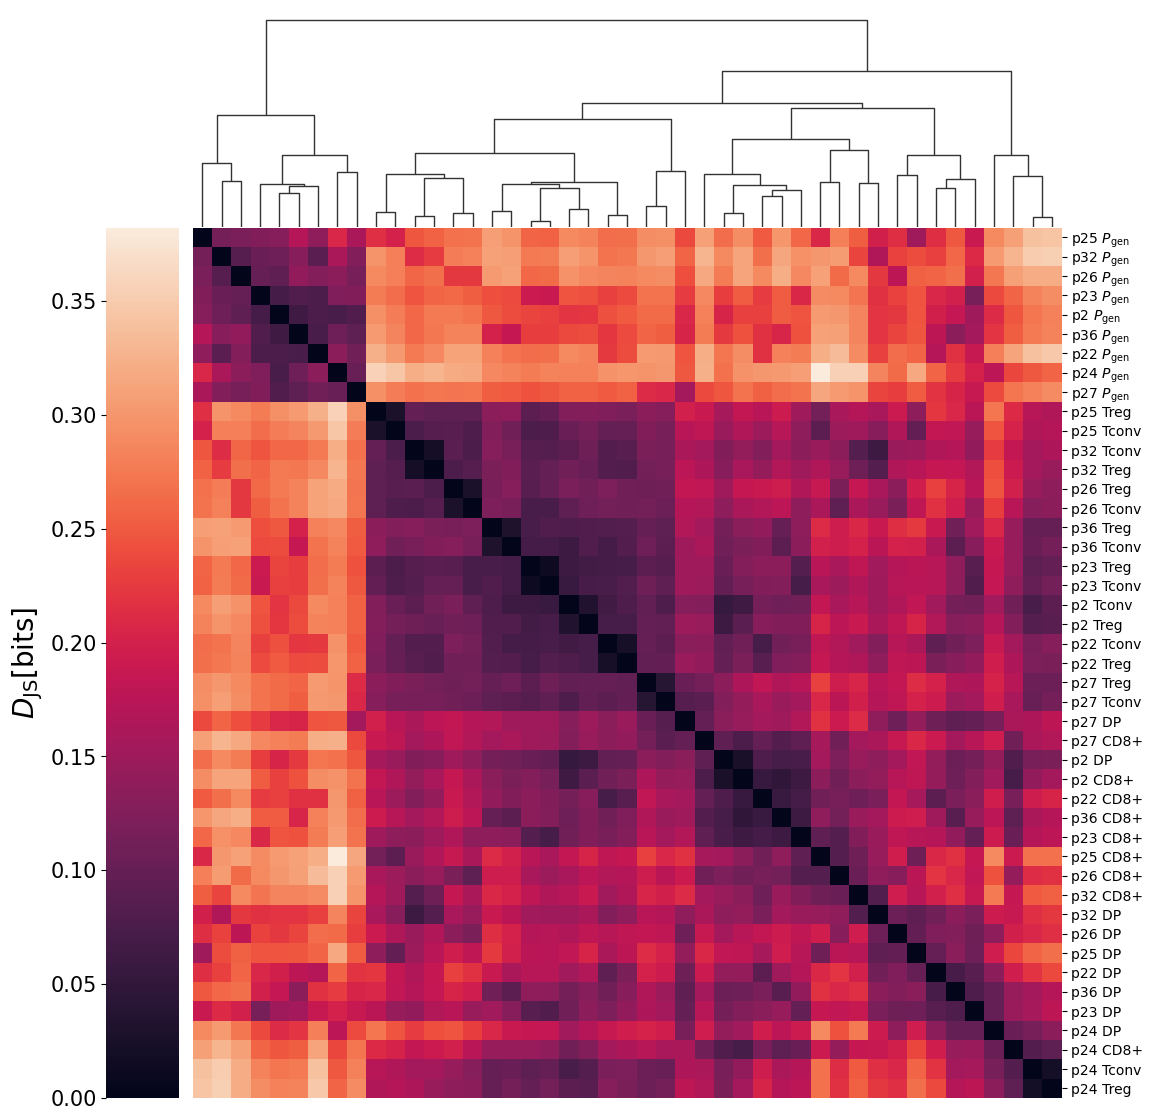

In [12]:
columns=[' '.join([d.split('_')[0],names_dict[d.split('_')[1]]]) for d in matrix.columns]
linkage = hc.linkage(sp.distance.squareform(matrix.values), method='complete', optimal_ordering=True)
my_df=matrix.copy()
my_df.index= columns
my_df.columns=columns
g=sns.clustermap(my_df,cbar_kws={'label': r'$D_{\rm JS} {\rm [bits]}$'},figsize=(12,12),row_linkage=linkage, col_linkage=linkage)
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
g.ax_heatmap.xaxis.set_visible(False)
g.cax.figure.axes[-1].yaxis.label.set_size(20)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=15)
for a in g.ax_row_dendrogram.collections:
    a.set_linewidth(1)
for a in g.ax_col_dendrogram.collections:
    a.set_linewidth(1)
g.ax_row_dendrogram.set_visible(False)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 10)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 10)
g.cax.yaxis.set_ticks_position("left")
g.cax.yaxis.set_label_position('left')
dendro_box = g.ax_row_dendrogram.get_position()
dendro_box.x0 = (dendro_box.x0 + 2 * dendro_box.x1) / 3 -0.01
dendro_box.x1=dendro_box.x1-0.01
g.cax.set_position(dendro_box)
plt.show()